### Machine Learning
---
**Function minimization**
$$y = f(x)$$
At any root of $\frac{dy}{dx}=0$ function $f(x)$ reaches its minimum if $\frac{d^2y}{dx^2} > 0$ at the root.

If function $f(x)$ is a convex function then it has a unique minima.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import (
    LabelEncoder, 
    OneHotEncoder,
    MultiLabelBinarizer,
    scale
)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-muted")

***Sample graph of quadratic equation***

---
$ y = x^2 $

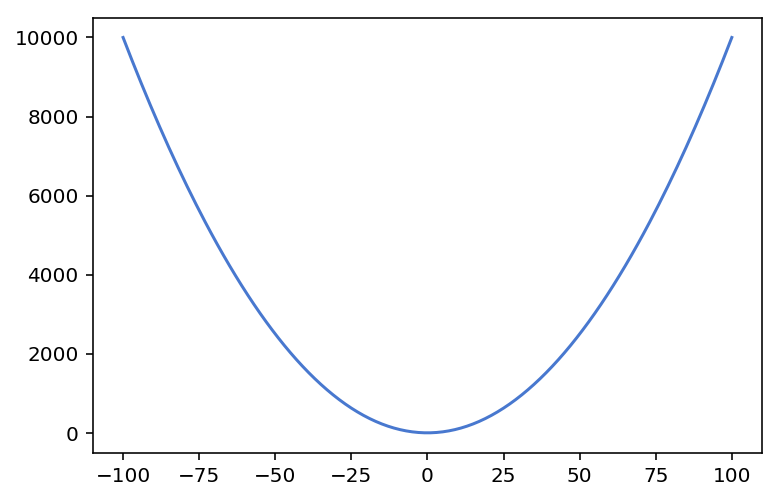

In [2]:
x = np.arange(-100, 101)
y = x * x
plt.plot(x, y);

***Sample graph of cubic equation***

---
$$ y = x^3 - x^2 - 40x + 112 $$

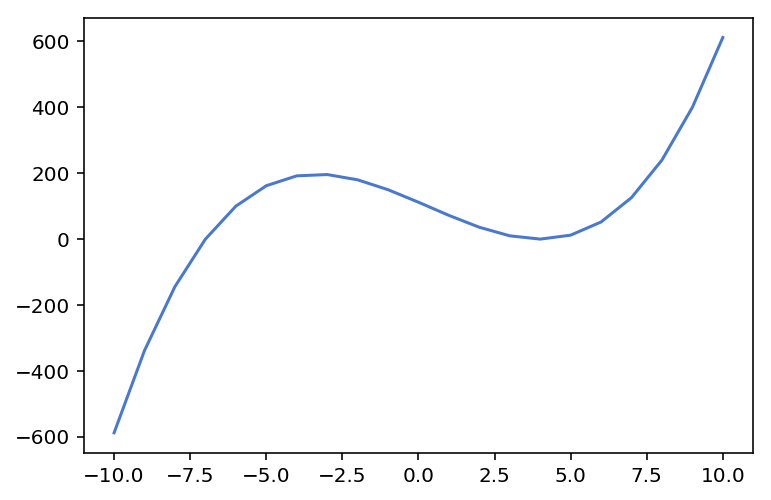

In [3]:
x = np.arange(-10, 11)
y = (x - 4) * (x - 4) * (x + 7)
plt.plot(x, y);

***Sample graph of function of quartic***

---
$$ y = x^4 - x^2 + 50x + 336 $$

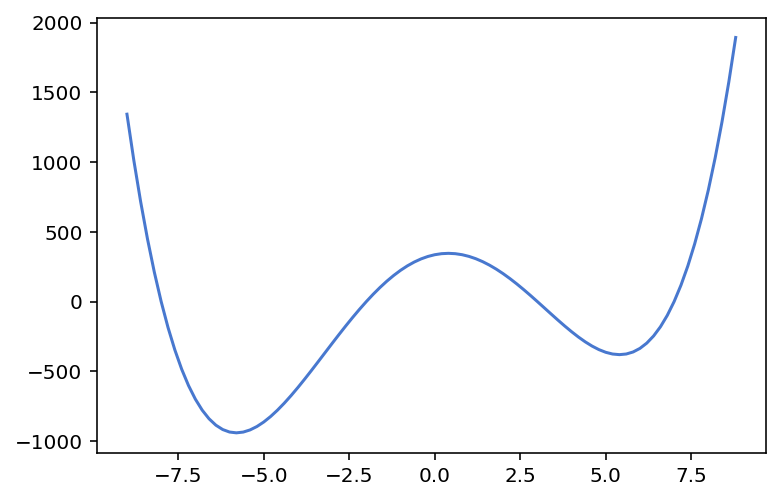

In [4]:
x = np.arange(-9, 9, 0.2)
y = (x - 7) * (x - 3) * (x + 2) * (x + 8)
plt.plot(x, y);

***Data that is generated with some random process***

---
$$ y = 2x + 3 + \epsilon $$

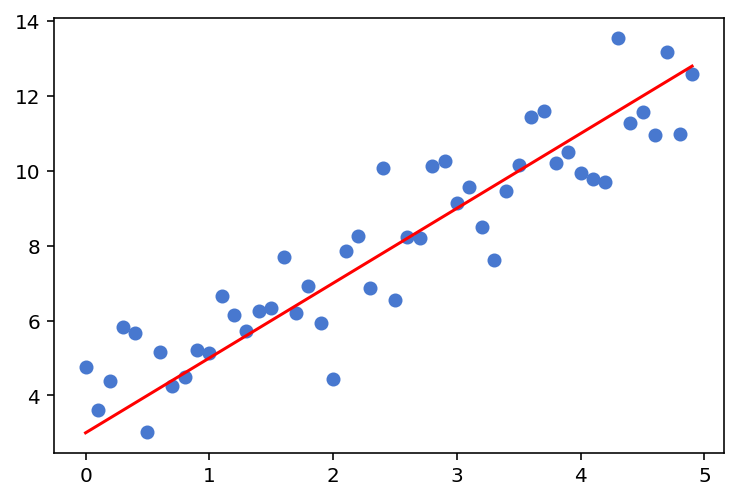

In [5]:
np.random.seed(0)
x = np.arange(0, 5.0, 0.1)
y = 2 * x + 3
y_noisy = y + np.random.normal(size=x.size, scale=1)
plt.scatter(x, y_noisy);
plt.plot(x, y, 'r');

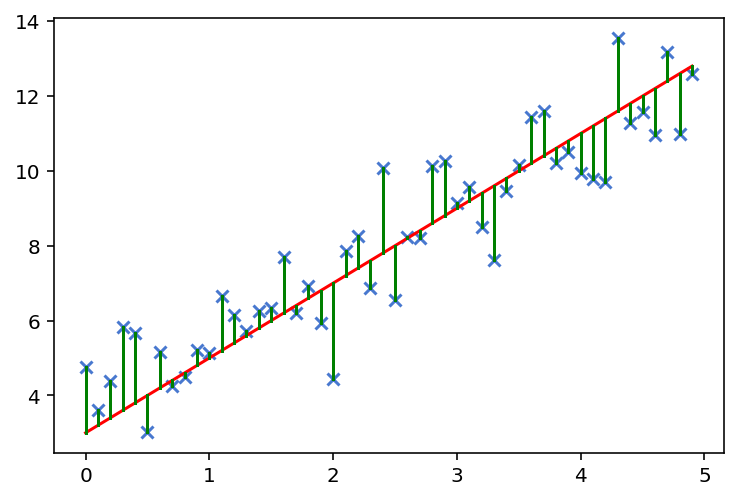

In [6]:
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y, 'r');
for xx, yy_n, yy in zip(x, y_noisy, y):
    plt.plot([xx, xx], [yy, yy_n], 'g')

***Cost Function***

---

$$J = \frac{1}{N}\sum_{i=1}^{N}(y-\hat{y})^2$$

/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


========= model parameter ========
===== intercept: 3.846371 
===== coefficient: [ 1.71191378]


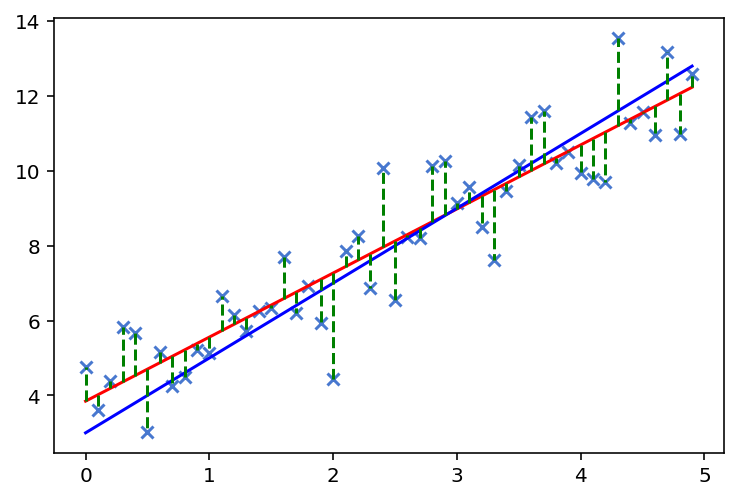

In [7]:
# Create A linear model for regression
model = LinearRegression()

# create feature
X = np.array([x]).T

# fit model
model.fit(X, y_noisy)

# display fitted model parameters
print ("========= model parameter ========")
print ("===== intercept: %f " % (model.intercept_))
print ("===== coefficient: %s" % (model.coef_))

# do prediction
y_ = x * model.coef_ + model.intercept_

# plot data
plt.scatter(x, y_noisy, marker='x');

# plot predicted line
plt.plot(x, y_, 'r');

# plot actual line
plt.plot(x, y, 'b');

# plot delta between actual noisy y and predicted y
for xx, yy_n, yy in zip(x, y_noisy, y_):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

---
### Second Example
$$ y = ax^2 + bx + c + \epsilon$$ 

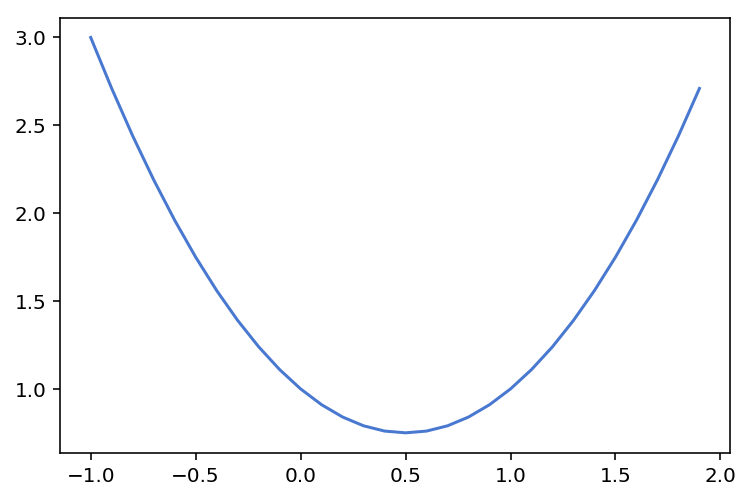

In [8]:
# generate a dataset from quadratic function
x = np.arange(-1.0, 2.0, 0.1)
y = x * x - x + 1
plt.plot(x, y);

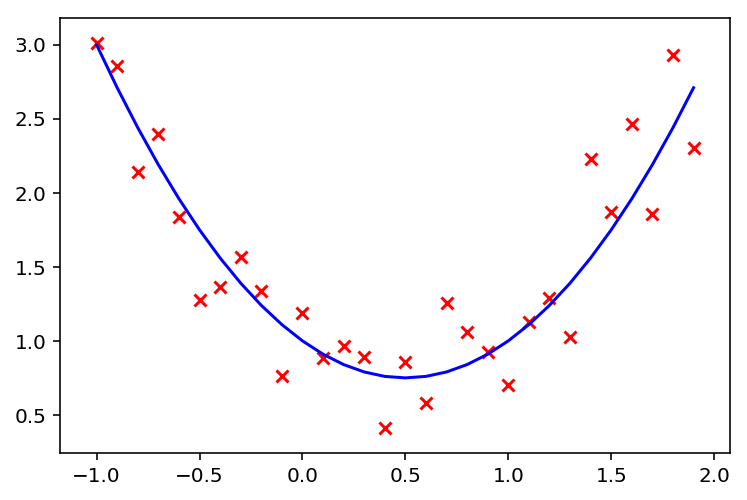

In [9]:
# create a noisy response for the synthetic dataset
np.random.seed(4)
y_noisy = y + np.random.normal(size=x.size, scale=0.3)
plt.plot(x, y, c='b');
plt.scatter(x, y_noisy, marker='x', c='r');

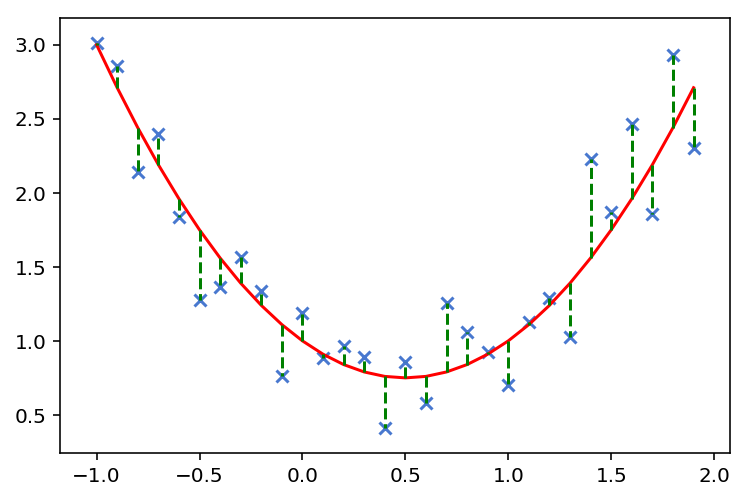

In [10]:
# plot delta between actual value of function and noisy value of function
plt.plot(x, y, 'r');
plt.scatter(x, y_noisy, marker='x');
for [xx, yy, yy_n] in zip(x, y, y_noisy):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

========= model parameter ========
===== intercept: 0.988722 
===== coefficient: [-0.93610029  0.99284846]


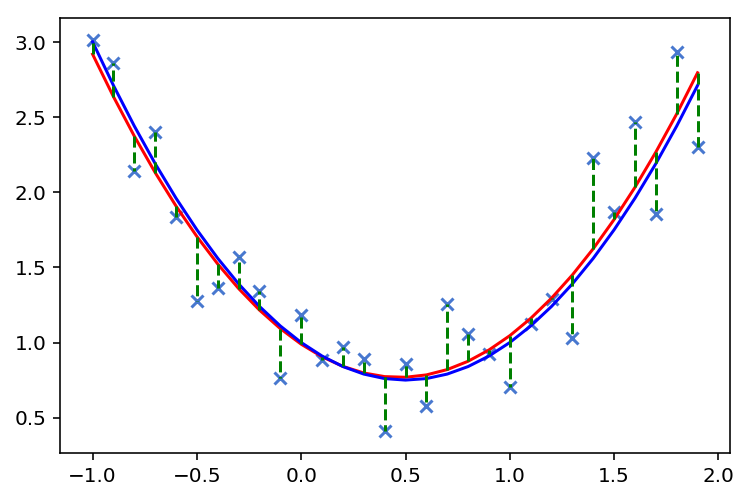

In [11]:
# Create A linear model for regression
model = LinearRegression()

# create feature
X = np.array([x, x*x]).T

# fit model
model.fit(X, y_noisy)

# display fitted model parameters
print ("========= model parameter ========")
print ("===== intercept: %f " % (model.intercept_))
print ("===== coefficient: %s" % (model.coef_))

# do prediction
y_ = model.predict(X)

# plot data
plt.scatter(x, y_noisy, marker='x');

# plot predicted line
plt.plot(x, y_, 'r');

# plot actual line
plt.plot(x, y, 'b');

# plot delta between actual noisy y and predicted y
for xx, yy_n, yy in zip(x, y_noisy, y_):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

## What if we don't know the function that can fit data?

---
Let data is generated from following 

### Regulerization
$$ \hat{y} = w^Tx $$
$$ J = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}-y)^2 + \frac{\lambda}{2}w^Tw$$

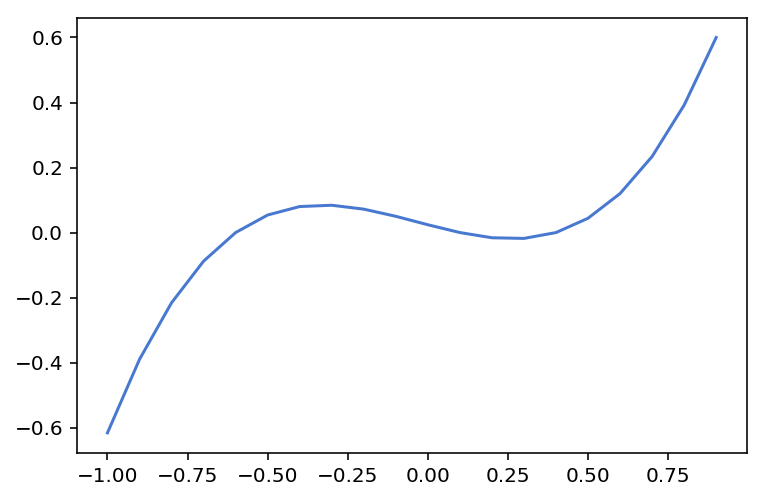

In [12]:
x = np.arange(-1, 1, 0.1)
y = (x - 0.4) * (x - 0.1) * (x + 0.6)
plt.plot(x, y);

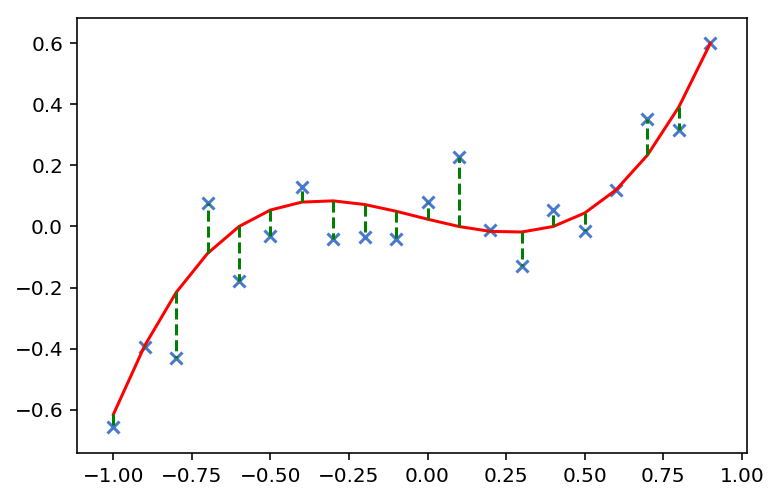

In [13]:
np.random.seed(2)
y_noisy = y + np.random.normal(size=x.size, scale=0.1)
plt.plot(x, y, 'r');
plt.scatter(x, y_noisy, marker='x');
for [xx, yy_n, yy] in zip(x, y_noisy, y):
    plt.plot([xx, xx], [yy, yy_n], 'g--');

Underfitting
---

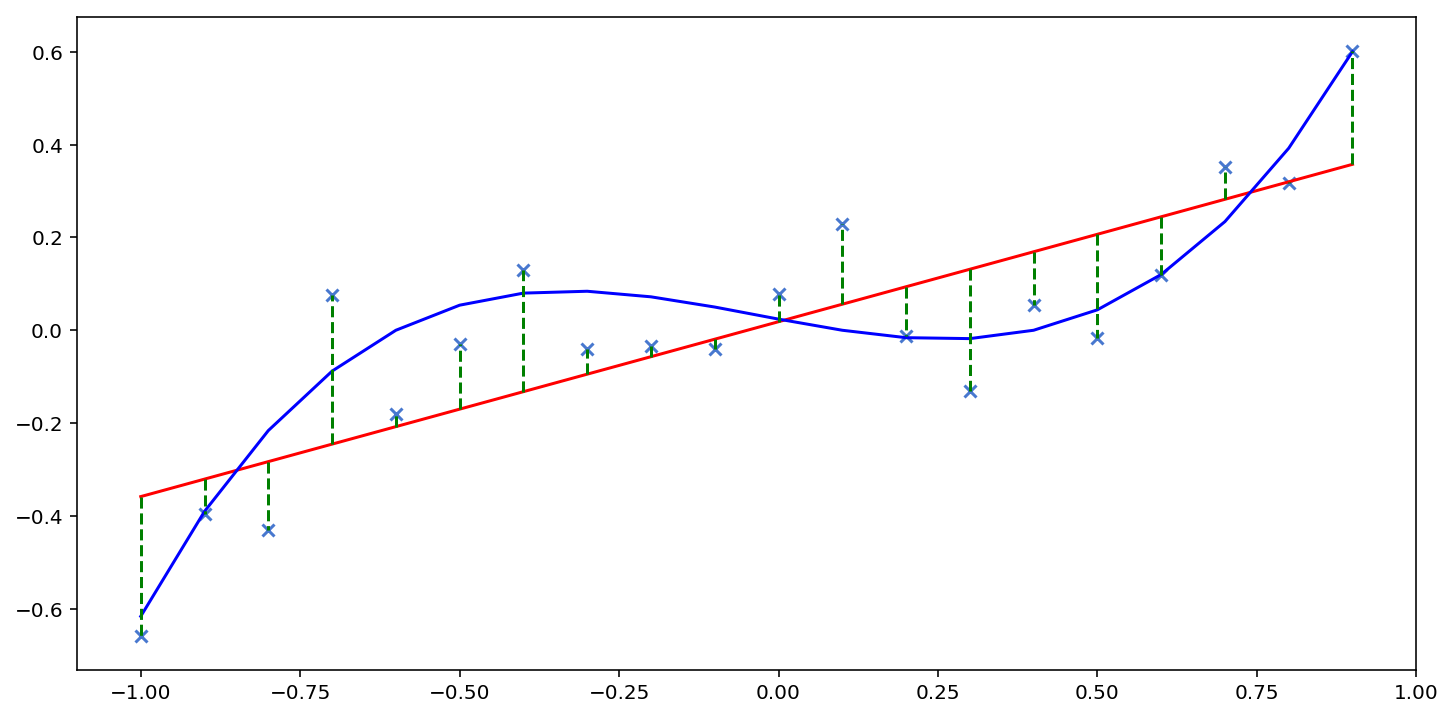

In [14]:
model = LinearRegression()
X = np.array([x]).T
model.fit(X, y_noisy)
y_ = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y_, 'r');
plt.plot(x, y, 'b');
for xx, yy_n, yy in zip(x, y_noisy, y_):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

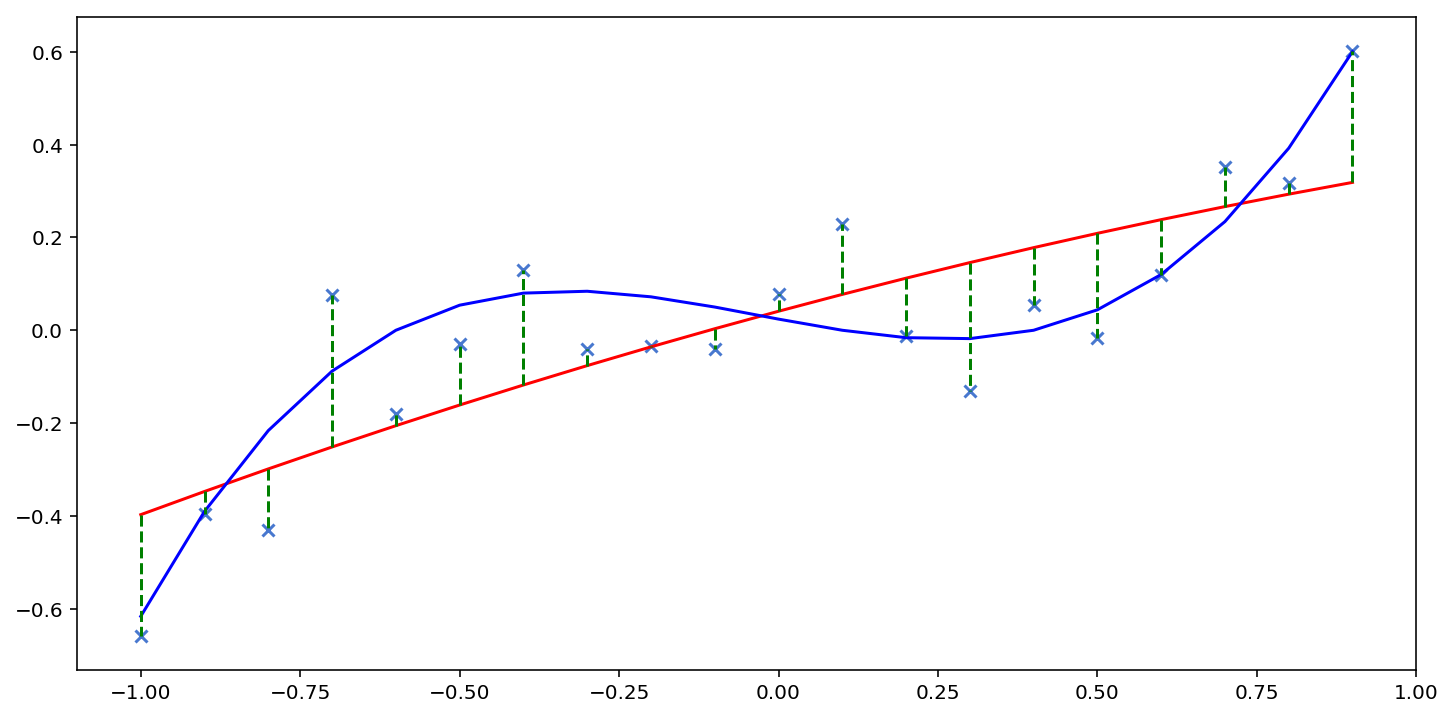

In [15]:
model = LinearRegression()
X = np.array([x, np.power(x, 2)]).T
model.fit(X, y_noisy)
y_ = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y_, 'r');
plt.plot(x, y, 'b');
for xx, yy_n, yy in zip(x, y_noisy, y_):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

Ideal set of features
---

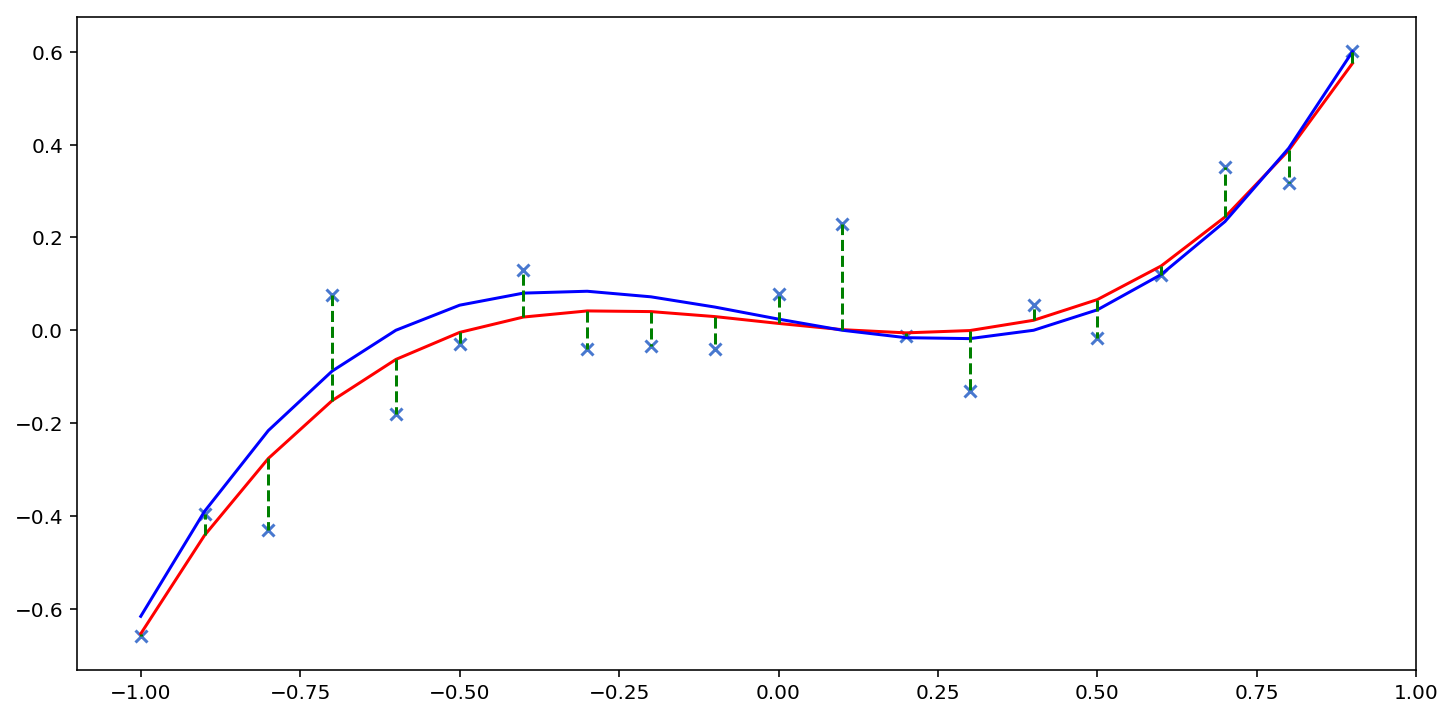

In [16]:
model = LinearRegression()
X = np.array([x, np.power(x, 2), np.power(x, 3)]).T
model.fit(X, y_noisy)
y_ = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y_, 'r');
plt.plot(x, y, 'b');
for xx, yy_n, yy in zip(x, y_noisy, y_):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

Overfitting
---

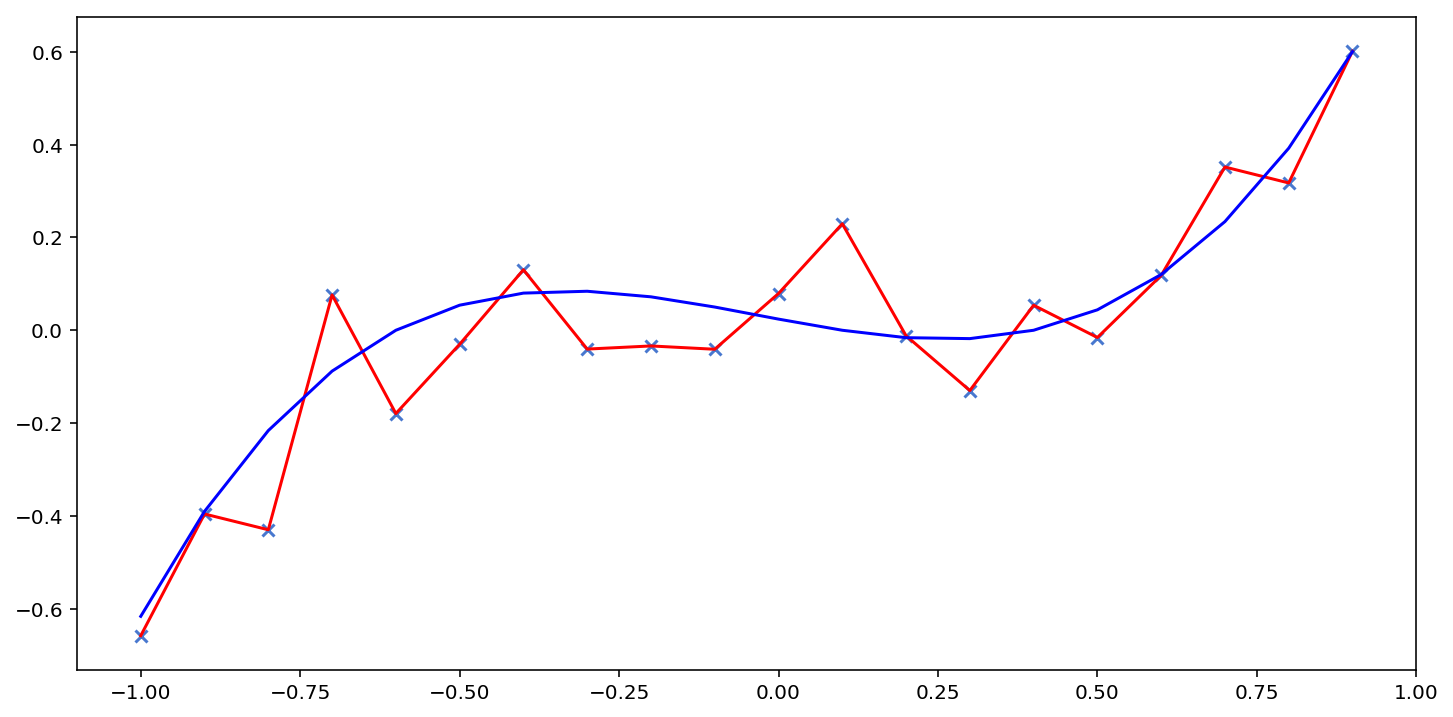

In [17]:
model = Ridge(0.0)
X = np.array([np.power(x, i) for i in range(0, 20)]).T
model.fit(X, y_noisy)
y_ = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y_, 'r', antialiased=True);
plt.plot(x, y, 'b');
for xx, yy_n, yy, yo in zip(x, y_noisy, y_, y):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

Prevent Overfitting
---
***Regularization***

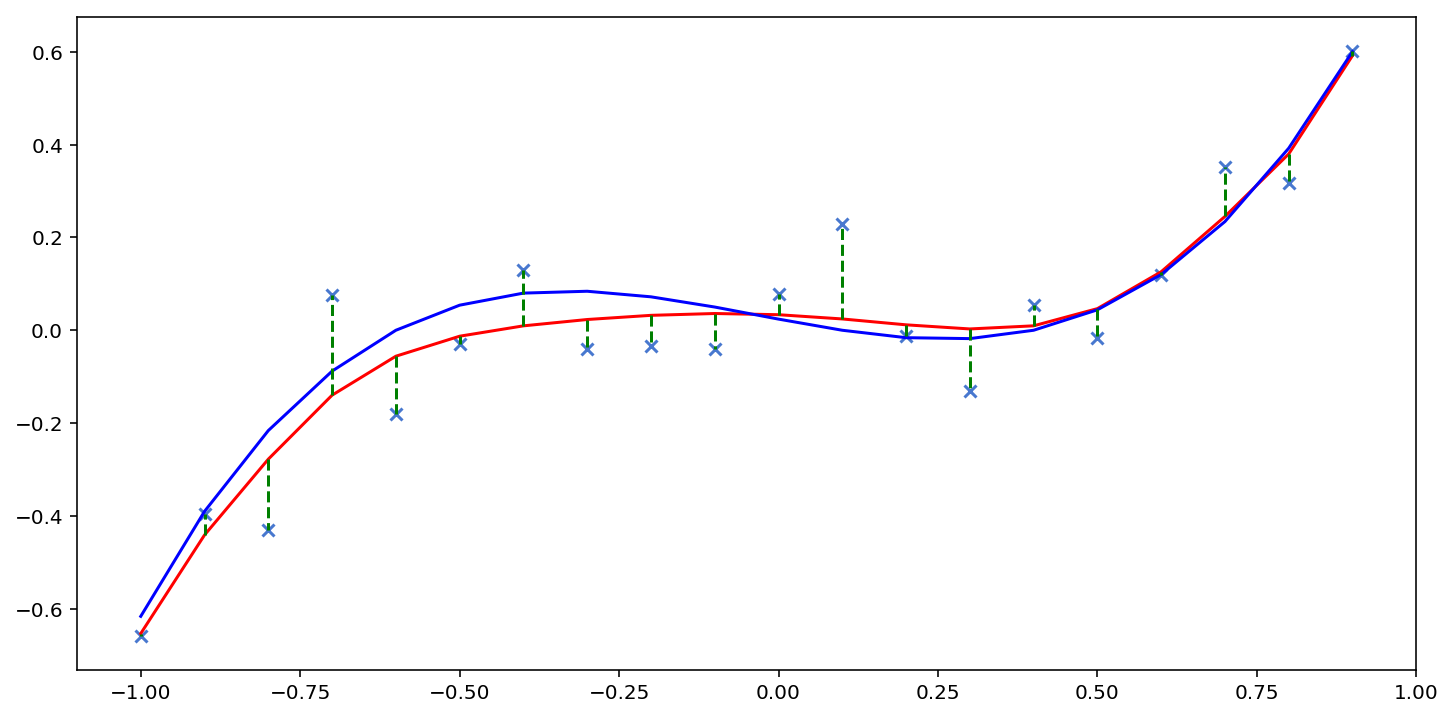

In [18]:
model = Ridge(0.001)
X = np.array([np.power(x, i) for i in range(0, 20)]).T
model.fit(X, y_noisy)
y_ = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y_, 'r');
plt.plot(x, y, 'b');
for xx, yy_n, yy, yo in zip(x, y_noisy, y_, y):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

***Bring More Data***

In [19]:
x = np.arange(-1, 1, 0.02)
y = (x - 0.4) * (x - 0.1) * (x + 0.6)
np.random.seed(2)
y_noisy = y + np.random.normal(size=x.size, scale=0.1)

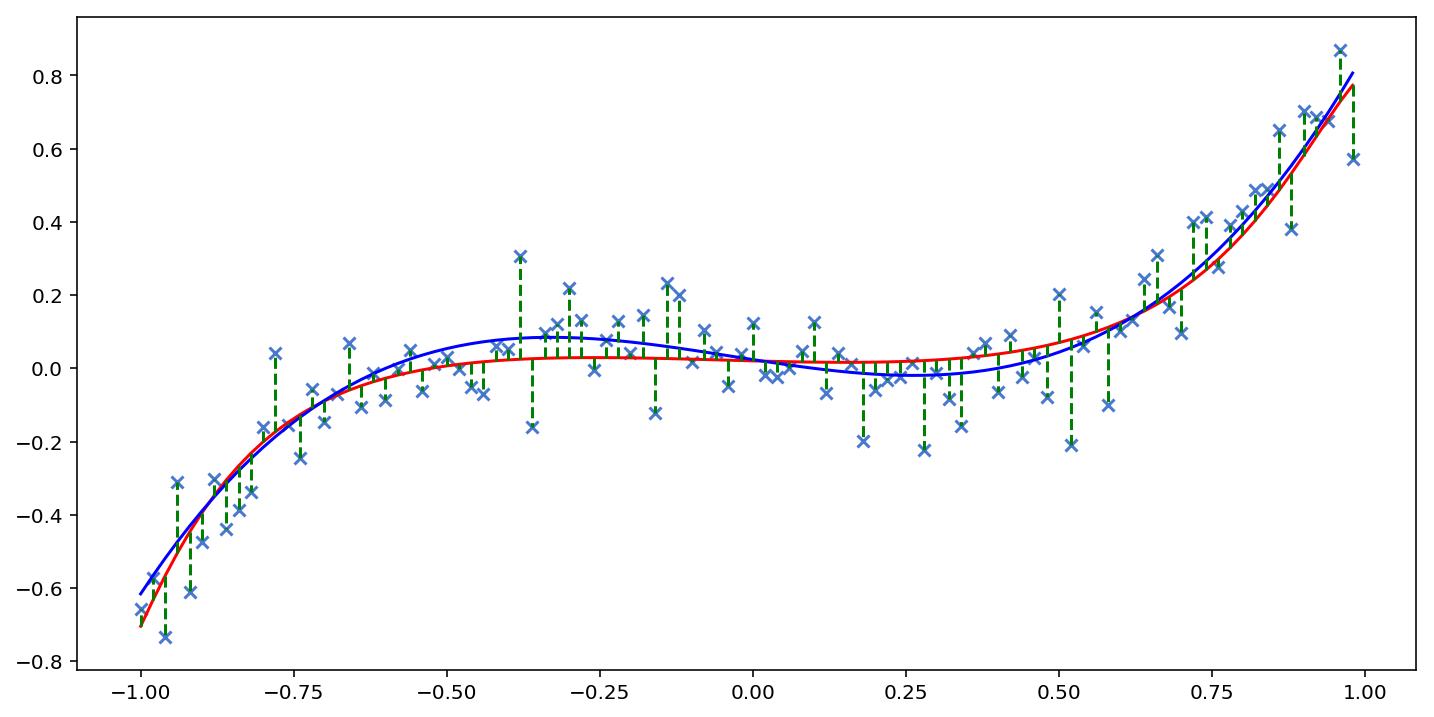

In [20]:
model = Ridge()
X = np.array([np.power(x, i) for i in range(0, 20)]).T
model.fit(X, y_noisy)
y_ = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, marker='x');
plt.plot(x, y_, 'r');
plt.plot(x, y, 'b');
for xx, yy_n, yy, yo in zip(x, y_noisy, y_, y):
    plt.plot([xx, xx], [yy, yy_n], 'g--')

# Real World Example

***Hourly Bike Sharing Dataset***

Hadi Fanaee-T

<div style="font-size:smaller">Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal
</div>

***Background***

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

***Dataset***

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

***Associated Tasks***
- Regression: Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
- Event and Anomaly Detection:  Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines. For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.

***Dataset Characteristics***
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : normalized temperature in celsius. the values are divided to 41 (max)
* atemp: normalized feeling temperature in celsius. the values are divided to 50 (max)
* hum: normalized humidity. the values are divided to 100 (max)
* windspeed: normalized wind speed. the values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

<div style="color: #444; font-size:smaller">Note: This is basically a time series data but I am not doing time series analysis. Instead I am doing simple regression and thereafter I will try xgboost that greatly improve accuracy. In addition I will try to detect outlier using unsupervised learning</div>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import (
    LabelEncoder, 
    OneHotEncoder,
    MultiLabelBinarizer,
    scale
)
import statsmodels.api as sm
import xgboost

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-muted")

/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
df = pd.read_csv("data/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Feature Extraction and Preprocessing
---

In [23]:
df['interaction_mnth_hr'] = df.mnth.astype(str).str.cat(df.hr.astype(str))
df['interaction_holiday_hr'] = df.holiday.astype(str).str.cat(df.hr.astype(str))
df['interaction_season_hr'] = df.season.astype(str).str.cat(df.hr.astype(str))

def ordinal(v):
    return np.arange(v+1)+1

columns = ['hr_{}'.format(i) for i in range(24)]
hour_ord = [pd.DataFrame(MultiLabelBinarizer().fit_transform(df.hr.apply(ordinal)), columns=columns)]

In [24]:
# nominal variables
nominal_column = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 
                  'interaction_mnth_hr', 'interaction_holiday_hr', 'interaction_season_hr']

nominal_fature = [pd.get_dummies(df[column], drop_first=True, prefix=column) for column in nominal_column]

# Ratio variables
ratio_column = ['temp', 'atemp', 'hum', 'windspeed']

# create an intercept term
intercept = pd.DataFrame(np.ones(shape=(df.shape[0], 1)), columns=["(intercept)"])

# input features
features = pd.concat([intercept] + [df[ratio_column]] + nominal_fature + hour_ord, axis=1)

# label variable
label = df['cnt']

In [25]:
def identity(x):
    return x

def predicted_df(model, X, y, func=identity):
    y_ = model.predict(X.values)
    df_ = func(y).to_frame()
    df_['pred'] = func(y_)
    df_['err'] = abs(df_['pred'] - func(y))
    return df_

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

Model Training
---

***Let's start with linear regression***

RMSE: 9896.500094


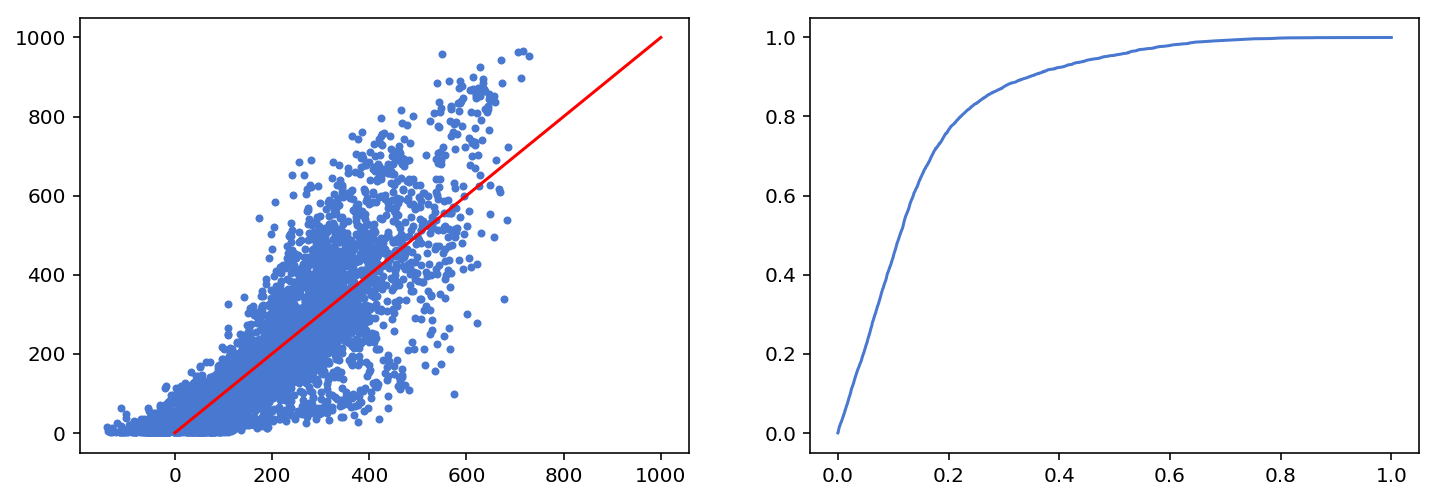

In [26]:
lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(X_train, y_train)
lr_prediction = predicted_df(lr_model, X_test, y_test)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(lr_prediction.pred, lr_prediction.cnt, marker='.');
plt.plot([0, 1000], [0, 1000], 'r');

plt.subplot(122)
x_error = lr_prediction.err.sort_values() / lr_prediction.err.max()
y_example = np.arange(lr_prediction.shape[0], dtype=float) / lr_prediction.shape[0]
plt.plot(x_error, y_example);

print ("RMSE: %f" % mean_squared_error(lr_prediction.pred, lr_prediction.cnt))

In linear regression we see that
* There is huge residual
* It predict negative value that is not possible count variable

Therefore we should try different kind of linear model. Generally count variable follow possion distribution, so lets use generalized linear model with possion distribution or log link function.

***Generalized Linear Model with Possion Distribution***

In [27]:
glm = sm.GLM(y_train, X_train, family=sm.families.Poisson())
poission_model = glm.fit()
print(poission_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                12165
Model:                            GLM   Df Residuals:                    11767
Model Family:                 Poisson   Df Model:                          397
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2354e+05
Date:                Mon, 23 Jul 2018   Deviance:                   3.6941e+05
Time:                        00:20:24   Pearson chi2:                 3.60e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
(intercept)                    1.4081      0.015     92.392      0.000       1.378       1.438
temp

In [28]:
pstr = predicted_df(poission_model, X_train, y_train)

8676.54865571


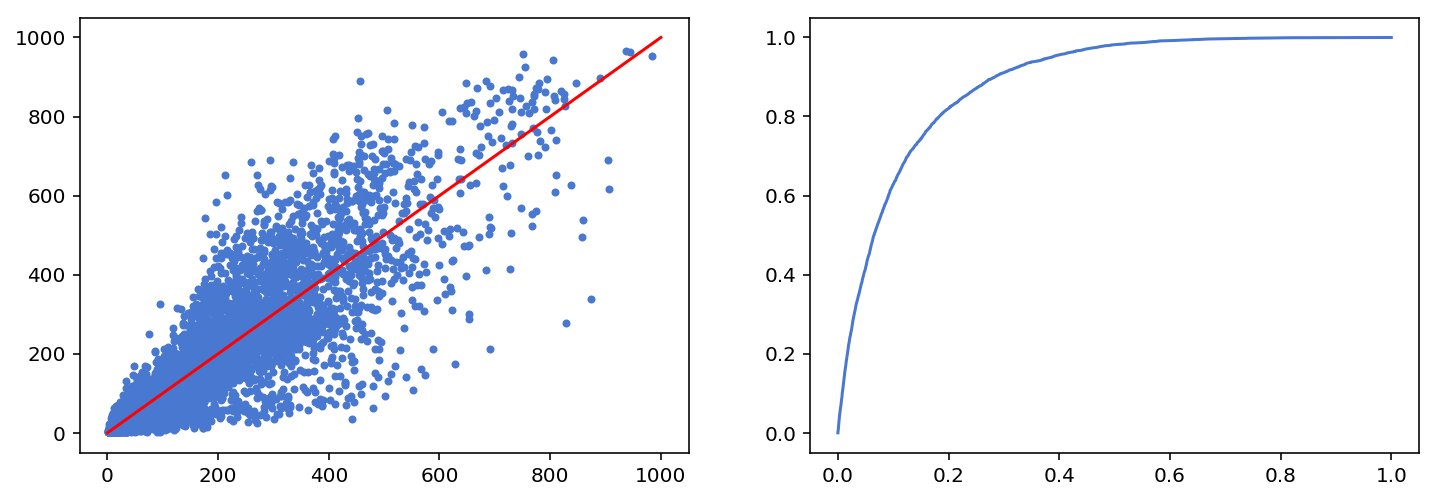

In [29]:
poission_prediction = predicted_df(poission_model, X_test, y_test)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(poission_prediction.pred, poission_prediction.cnt, marker='.');
plt.plot([0, 1000], [0, 1000], 'r');

plt.subplot(122)
x_error = poission_prediction.err.sort_values() / poission_prediction.err.max()
y_example = np.arange(poission_prediction.shape[0], dtype=float) / poission_prediction.shape[0]
plt.plot(x_error, y_example);

print(mean_squared_error(poission_prediction.pred, poission_prediction.cnt))

Now prediction looks better. 
* We are not predicting negative value
* Prediction is balanced/symetric at ideal prediction line
* AUOC (Area under operating curve) is also better that the linear regresion model

---

#### Nonlinear model
***XGBoost***

2092.65354822


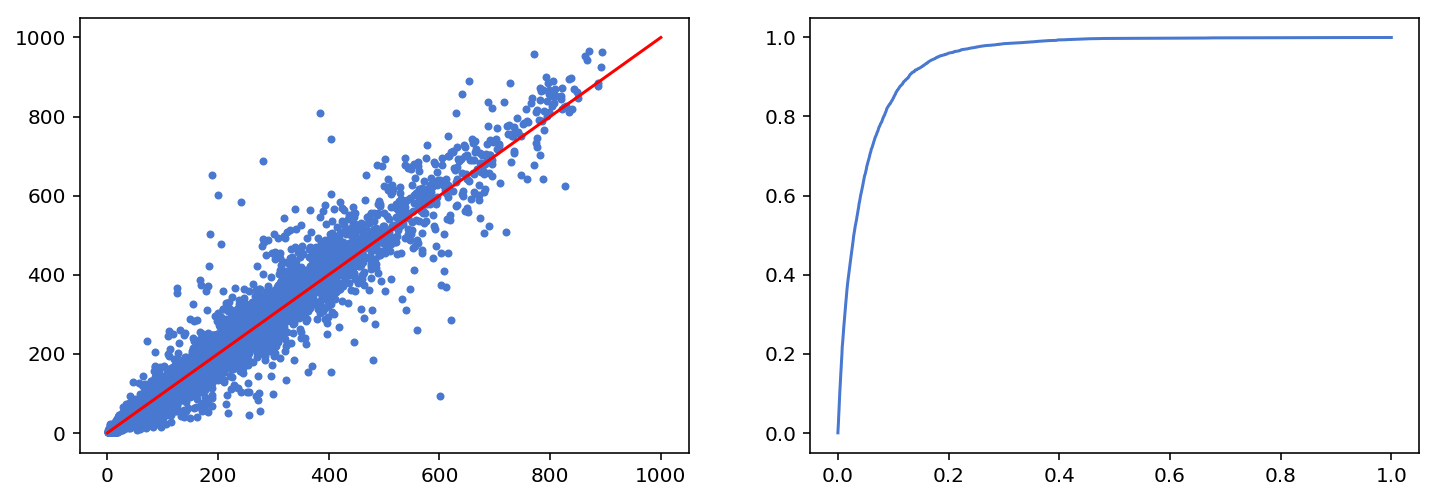

In [30]:
xgb_model = xgboost.XGBRegressor(
    max_depth=8, 
    n_estimators=256,
    silent=False,
    objective="count:poisson", 
    max_delta_step=1,
    reg_lambda = 1e-5,
    subsample = 0.7,
)

xgb_model.fit(X_train.values, y_train)
xgb_prediction = predicted_df(xgb_model, X_test, y_test)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(xgb_prediction.pred, xgb_prediction.cnt, marker='.');
plt.plot([0, 1000], [0, 1000], 'r');

plt.subplot(122)
x_error = xgb_prediction.err.sort_values() / xgb_prediction.err.max()
y_example = np.arange(xgb_prediction.shape[0], dtype=float) / xgb_prediction.shape[0]
plt.plot(x_error, y_example);

print (mean_squared_error(xgb_prediction.pred, xgb_prediction.cnt))